In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

In [ ]:
df.isnull().sum()

,0
Borough Location,0
Park Location,0
Sports Played,0
Week Start Date,0
Week End Date,0
Sunday's Attendance,0
Monday's Attendance,0
Tuesday's Attendance,0
Wednesday's Attendance,0
Thursday's Attendance,0


In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Borough Location        425 non-null    object
 1   Park Location           425 non-null    object
 2   Sports Played           425 non-null    object
 3   Week Start Date         425 non-null    object
 4   Week End Date           425 non-null    object
 5   Sunday's Attendance     425 non-null    int64 
 6   Monday's Attendance     425 non-null    int64 
 7   Tuesday's Attendance    425 non-null    int64 
 8   Wednesday's Attendance  425 non-null    int64 
 9   Thursday's Attendance   425 non-null    int64 
 10  Friday's Attendance     425 non-null    int64 
 11  Saturday's Attendance   425 non-null    int64 
 12  Attendance Sum          425 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 43.3+ KB


In [ ]:


df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


0


In [ ]:
df.head()

,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum
0,Queens,Playground for All Children,"Soccer, Basketball, ultimate Frisbee",04/23/2017,04/22/2017,25,20,30,26,22,100,37,260
1,Queens,Playground for All Children,Basketball,04/30/2017,05/06/2017,250,95,120,180,400,0,0,1045
2,Queens,Playground for All Children,Soccer,05/07/2017,05/13/2017,590,180,250,440,550,730,0,2740
3,Queens,Playground for All Children,Pillow Polo,05/14/2017,05/20/2017,550,708,58,680,975,333,670,3974
4,Queens,Playground for All Children,All sports,05/21/2017,05/27/2017,300,375,280,200,0,370,800,2325


TWO refined Questions

Q1:  Which team sports with high attendance rates saw the steepest decline in participation following the COVID-19 pandemic, and how might the nature of these sports contribute to this decrease?


In [ ]:
# Convert 'Week Start Date' to datetime
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])

# Extract Year from 'Week Start Date'
df['Year'] = df['Week Start Date'].dt.year

# Sum weekday (Mon + Tue) and weekend (Sat + Sun) attendance
df['Weekday Attendance'] = df["Monday's Attendance"] + df["Tuesday's Attendance"]
df['Weekend Attendance'] = df["Saturday's Attendance"] + df["Sunday's Attendance"]

# Group by sport to get mean weekday & weekend attendance
attendance_df = df.groupby('Sports Played')[['Weekday Attendance', 'Weekend Attendance']].mean()

# Select top 30 sports by Weekend Attendance
attendance_summary = attendance_df.nlargest(30, 'Weekend Attendance')

# Get average total attendance by year
attendance_trends = df.groupby('Year')['Attendance Sum'].mean().reset_index()

# If you want 'Year' as string for categorical plotting
attendance_trends['Year'] = attendance_trends['Year'].astype(str)

# Segment the data into Pre-COVID, COVID, and Post-COVID
pre_covid = df[df['Year'].between(2017, 2019)]
covid = df[df['Year'] == 2020]
post_covid = df[df['Year'] == 2021]

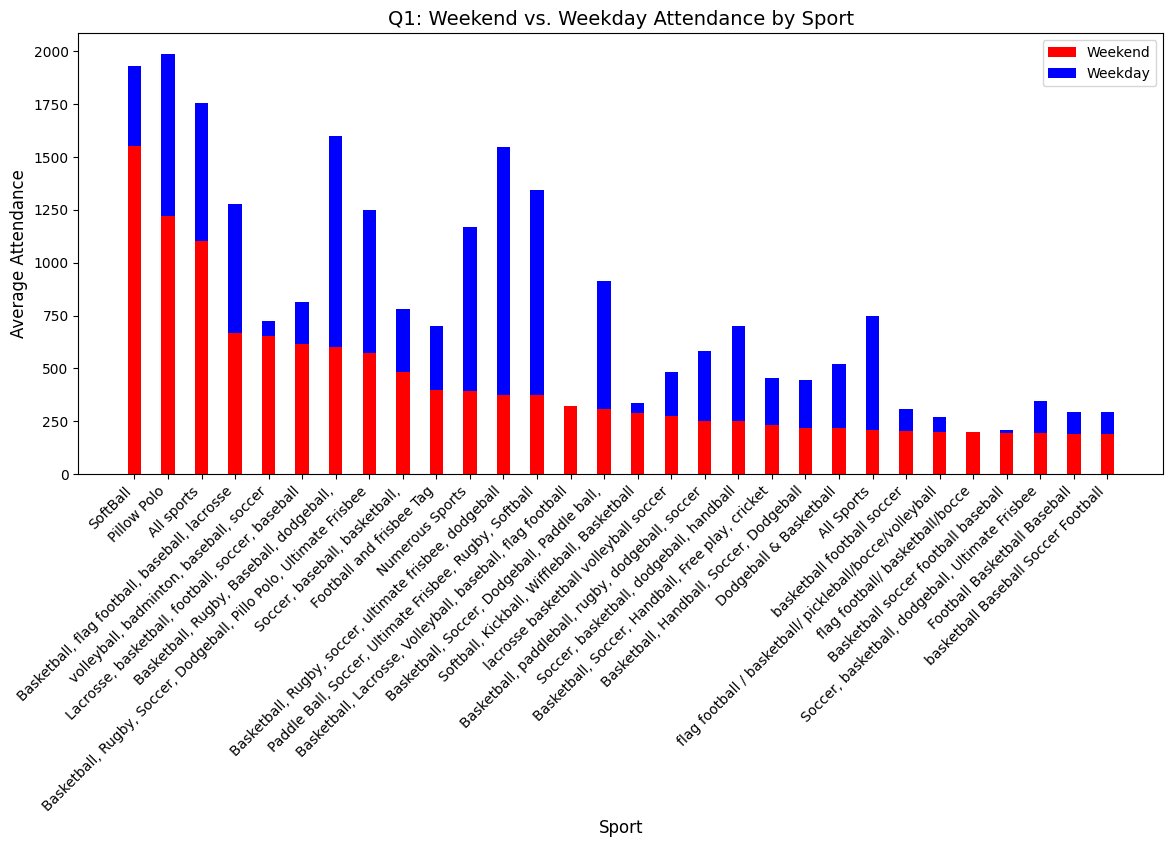

In [ ]:
# Define bar width
bar_width = 0.4

# Create x-axis positions
x_pos = np.arange(len(attendance_summary))

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(x_pos, attendance_summary['Weekend Attendance'], bar_width, label='Weekend', color='red')
ax.bar(x_pos, attendance_summary['Weekday Attendance'], bar_width, bottom=attendance_summary['Weekend Attendance'], label='Weekday', color='blue')

# Set labels and title
ax.set_title('Q1: Weekend vs. Weekday Attendance by Sport', fontsize=14)
ax.set_xlabel('Sport', fontsize=12)
ax.set_ylabel('Average Attendance', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(attendance_summary.index, rotation=45, ha='right')

# Add legend
ax.legend()

# Fix layout issue
plt.subplots_adjust(bottom=0.25)  # Adjust bottom margin to avoid label cutoff

plt.show()

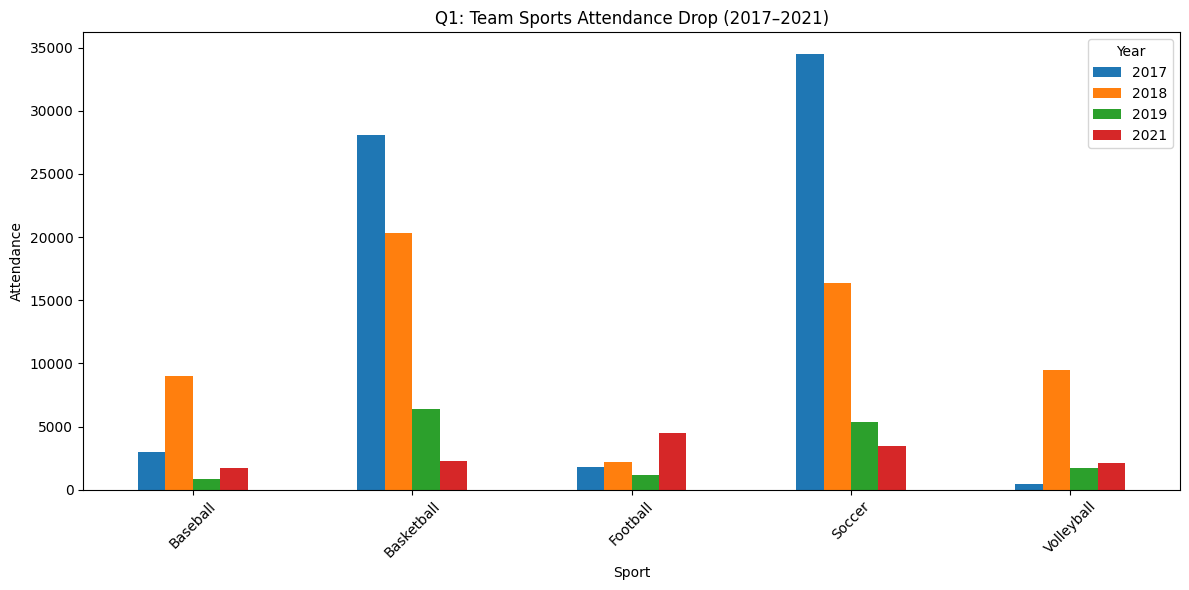

In [ ]:
import re
# Create a copy of the DataFrame to avoid the warning
df = df.copy()

# Clean and split sports again (just to be sure)
df.loc[:, 'Sports Played'] = df['Sports Played'].str.strip()  # remove leading/trailing spaces
df.loc[:, 'Sports Played'] = df['Sports Played'].str.replace(r'\s*,\s*', ',', regex=True)  # normalize commas

# Split by comma and explode into new rows
df_split = df.assign(Sport=df['Sports Played'].str.split(',')).explode('Sport')
df_split.loc[:, 'Sport'] = df_split['Sport'].str.strip().str.title()

# Step 1: Clean and Prepare Data
df = pd.read_csv("Summer_Sports_Experience__2017_to_2021.csv")
df["Week Start Date"] = pd.to_datetime(df["Week Start Date"], errors='coerce')
df["Year"] = df["Week Start Date"].dt.year
df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)
df["Sports Played"] = df["Sports Played"].str.split(", ")
df = df.explode("Sports Played")

def clean_sport_name(s):
    s = s.lower()
    s = re.sub(r'[^a-z\s]', '', s)
    s = s.replace("and", "")
    return s.strip().title()

df["Sport"] = df["Sports Played"].apply(clean_sport_name)

# Step 2: Group by year and sport
attendance = df.groupby(["Year", "Sport"])["Attendance Sum"].sum().reset_index()

# Step 3: Pivot data for easier comparison
attendance_pivot = attendance.pivot(index="Sport", columns="Year", values="Attendance Sum").fillna(0)

# Step 4: Pre-COVID average vs Post-COVID
attendance_pivot["Pre_COVID_Avg"] = attendance_pivot[[2017, 2018, 2019]].mean(axis=1)
attendance_pivot["Change_2021"] = attendance_pivot[2021] - attendance_pivot["Pre_COVID_Avg"]

# Step 5: Q1 - Team Sports That Dropped
team_sports = ["Basketball", "Soccer", "Football", "Baseball", "Volleyball"]
team_df = attendance_pivot.loc[attendance_pivot.index.isin(team_sports)]

team_df[[2017, 2018, 2019, 2021]].plot(kind="bar", figsize=(12,6), title="Q1: Team Sports Attendance Drop (2017–2021)")
plt.ylabel("Attendance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and clean data
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

# Convert dates and create period classification
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])
df['Year'] = df['Week Start Date'].dt.year
df['Period'] = df['Year'].apply(lambda x: 'Pre-COVID' if x < 2020 else ('During-COVID' if x == 2020 else 'Post-COVID'))

# Calculate average attendance by sport and period
team_sports = ["Basketball", "Soccer", "Football", "Baseball", "Volleyball"]
team_sports_data = df[df['Sports Played'].isin(team_sports)].copy()

# Create interactive visualization
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Q1: Team Sports Attendance Trends', 'Q1: Period Comparison'),
                    vertical_spacing=0.15,
                    specs=[[{"type": "scatter"}],
                          [{"type": "bar"}]])

# Add line plot for trends over time
for sport in team_sports:
    sport_data = team_sports_data[team_sports_data['Sports Played'] == sport]
    yearly_avg = sport_data.groupby('Year')['Attendance Sum'].mean()

    fig.add_trace(
        go.Scatter(x=yearly_avg.index,
                  y=yearly_avg.values,
                  name=sport,
                  mode='lines+markers',
                  hovertemplate="<b>%{x}</b><br>" +
                              "Sport: " + sport + "<br>" +
                              "Attendance: %{y:.0f}<br>"),
        row=1, col=1
    )

# Add bar chart for period comparison
period_avg = team_sports_data.groupby(['Period', 'Sports Played'])['Attendance Sum'].mean().reset_index()
fig.add_trace(
    go.Bar(x=period_avg['Sports Played'],
           y=period_avg[period_avg['Period'] == 'Pre-COVID']['Attendance Sum'],
           name='Pre-COVID',
           hovertemplate="<b>%{x}</b><br>" +
                        "Period: Pre-COVID<br>" +
                        "Avg Attendance: %{y:.0f}<br>"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=period_avg['Sports Played'],
           y=period_avg[period_avg['Period'] == 'Post-COVID']['Attendance Sum'],
           name='Post-COVID',
           hovertemplate="<b>%{x}</b><br>" +
                        "Period: Post-COVID<br>" +
                        "Avg Attendance: %{y:.0f}<br>"),
    row=2, col=1
)

# Update layout
fig.update_layout(
    title_text="Impact of COVID-19 on Team Sports Attendance",
    height=800,
    showlegend=True,
    hovermode='closest',
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True, True, True, True, True, True, True]}],
                    label="Show All",
                    method="restyle"
                ),
                dict(
                    args=[{"visible": [True, True, False, False, False, True, True]}],
                    label="Show Top 2 Sports",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Sports", row=2, col=1)
fig.update_yaxes(title_text="Average Attendance", row=1, col=1)
fig.update_yaxes(title_text="Average Attendance", row=2, col=1)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and prepare data
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

# Convert dates
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])
df['Year'] = df['Week Start Date'].dt.year

# Clean and standardize sports names
def standardize_sports(sports_string):
    if pd.isna(sports_string):
        return []

    # Convert to lowercase and replace various separators with comma
    sports_string = str(sports_string).lower()
    for separator in ['/', '&', ' and ', '  ', ' - ']:
        sports_string = sports_string.replace(separator, ',')

    # Split into list and clean each sport name
    sports = [sport.strip() for sport in sports_string.split(',')]

    # Remove empty strings and standardize common variations
    sports = [sport for sport in sports if sport]

    return sports

# Define main team sports to track
team_sports = {
    'basketball': 'Basketball',
    'soccer': 'Soccer',
    'football': 'Football',
    'flag football': 'Football',
    'volleyball': 'Volleyball',
    'baseball': 'Baseball',
    'softball': 'Baseball'  # Combining softball with baseball for simplicity
}

# Create new rows for each sport mentioned
df_expanded = df.copy()
df_expanded['Sports List'] = df_expanded['Sports Played'].apply(standardize_sports)
df_expanded = df_expanded.explode('Sports List')

# Standardize sport names using the mapping
df_expanded['Standardized Sport'] = df_expanded['Sports List'].map(
    lambda x: next((v for k, v in team_sports.items() if k in str(x)), None)
)

# Filter for team sports only
df_team = df_expanded[df_expanded['Standardized Sport'].notna()].copy()

# Calculate average attendance for pre-COVID and post-COVID
pre_covid = df_team[df_team['Year'].isin([2017, 2018, 2019])]
post_covid = df_team[df_team['Year'] == 2021]

pre_covid_avg = pre_covid.groupby('Standardized Sport')['Attendance Sum'].mean()
post_covid_avg = post_covid.groupby('Standardized Sport')['Attendance Sum'].mean()

# Calculate percentage change
percent_change = ((post_covid_avg - pre_covid_avg) / pre_covid_avg * 100).round(2)

# Create visualization
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Team Sports Attendance Over Time', 'Pre vs Post-COVID Comparison'),
    vertical_spacing=0.2,
    specs=[[{"type": "scatter"}], [{"type": "bar"}]]
)

# Add line plot showing trends over time
yearly_avg = df_team.groupby(['Year', 'Standardized Sport'])['Attendance Sum'].mean().reset_index()

for sport in team_sports.values():
    sport_data = yearly_avg[yearly_avg['Standardized Sport'] == sport]

    if not sport_data.empty:
        fig.add_trace(
            go.Scatter(
                x=sport_data['Year'],
                y=sport_data['Attendance Sum'],
                name=sport,
                mode='lines+markers',
                hovertemplate="<b>%{x}</b><br>" +
                             "Sport: " + sport + "<br>" +
                             "Avg Attendance: %{y:.0f}<br>" +
                             "% Change: " + str(percent_change.get(sport, 'N/A')) + "%",
            ),
            row=1, col=1
        )

# Add bar chart comparing pre and post COVID
available_sports = [sport for sport in team_sports.values() if sport in pre_covid_avg.index]

fig.add_trace(
    go.Bar(
        x=available_sports,
        y=[pre_covid_avg.get(sport, 0) for sport in available_sports],
        name='Pre-COVID (2017-2019)',
        marker_color='rgb(55, 83, 109)'
    ),
    row=2, col=1
)

fig.add_trace(
    go.Bar(
        x=available_sports,
        y=[post_covid_avg.get(sport, 0) for sport in available_sports],
        name='Post-COVID (2021)',
        marker_color='rgb(219, 64, 82)'
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    title_text="Impact of COVID-19 on Team Sports Attendance",
    height=800,
    showlegend=True,
    hovermode='x unified'
)

fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Sports", row=2, col=1)
fig.update_yaxes(title_text="Average Attendance", row=1, col=1)
fig.update_yaxes(title_text="Average Attendance", row=2, col=1)

fig.show()

Q2:Which sports became increasingly popular in the wake of the Covid-19 pandemic, and do they share characteristics such as being outdoor activities, individual-focused, or conducive to social distancing?

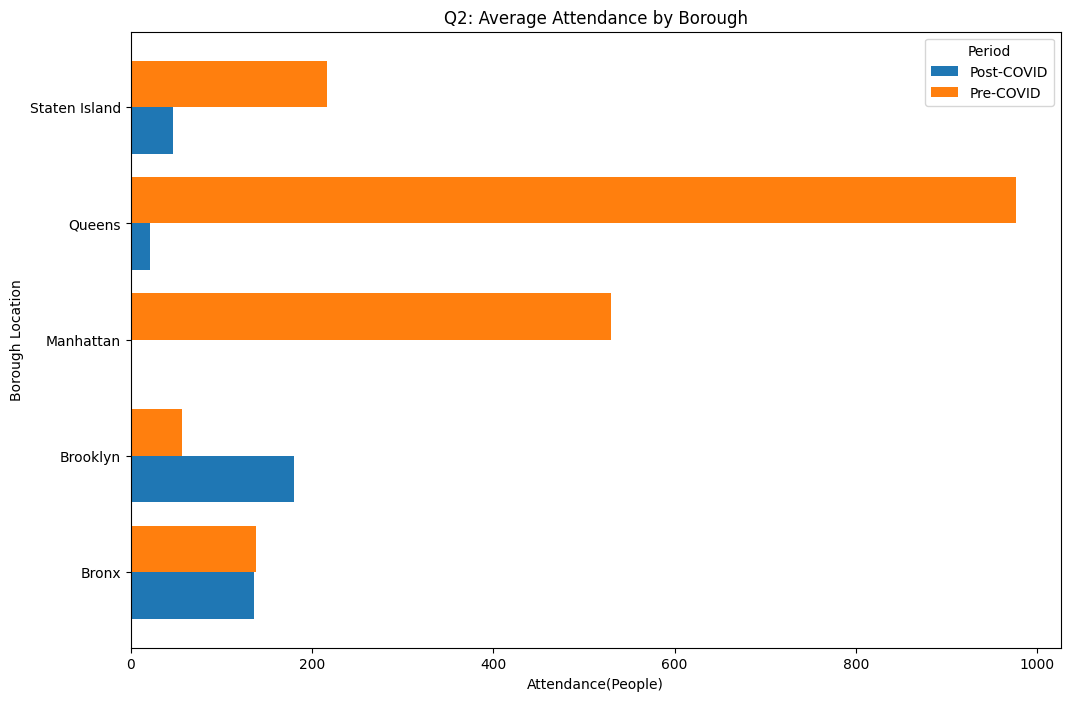

In [ ]:
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

# Convert dates to datetime format
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])
df['Week End Date'] = pd.to_datetime(df['Week End Date'])

# Create COVID period classification
cutoff_date = pd.to_datetime('2020-03-15')
df['Period'] = ['Post-COVID' if x >= cutoff_date else 'Pre-COVID'
               for x in df['Week Start Date']]

# Create analysis-ready dataframe
analysis_df = df[[
    'Borough Location',
    'Park Location',
    'Sports Played',
    'Week Start Date',
    'Period',
    'Attendance Sum'
]].copy()

borough_comparison = analysis_df.groupby(['Period','Borough Location'])['Attendance Sum'].mean().unstack(0)
borough_comparison.plot(kind='barh', figsize=(12,8), width=0.8)
plt.title('Q2: Average Attendance by Borough')
plt.xlabel('Attendance(People)')
plt.show()


<ipython-input-32-ac68caf2721c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




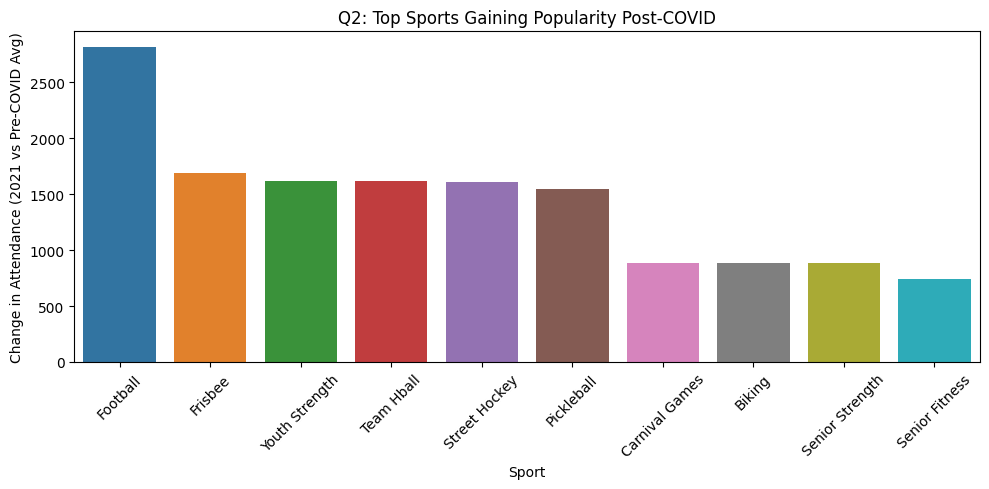

In [ ]:
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]
top_gainers = attendance_pivot.sort_values("Change_2021", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_gainers, x=top_gainers.index, y="Change_2021", palette=custom_colors)
plt.title("Q2: Top Sports Gaining Popularity Post-COVID")
plt.ylabel("Change in Attendance (2021 vs Pre-COVID Avg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

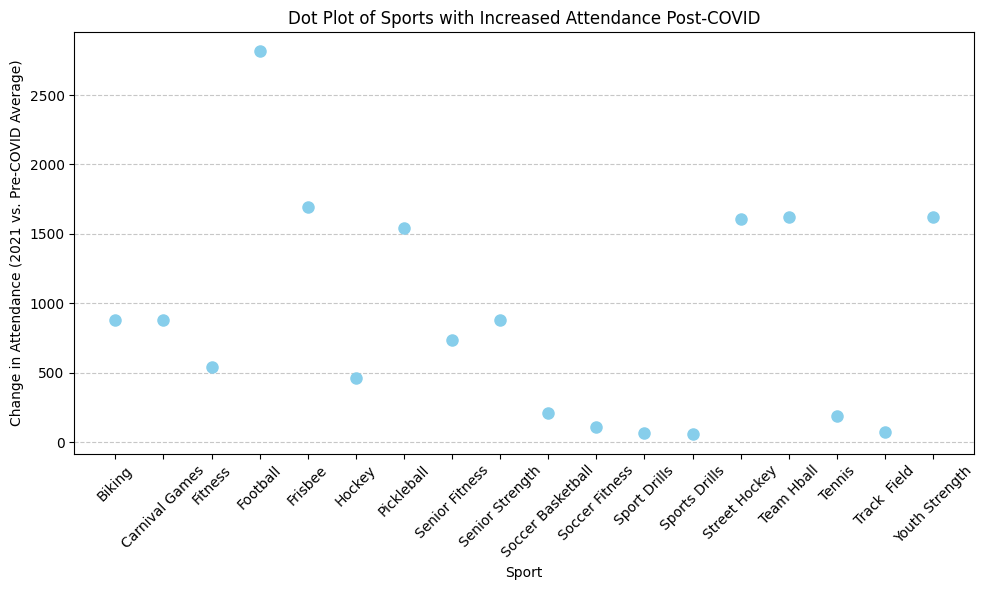

In [ ]:
significant_gainers = attendance_pivot[attendance_pivot["Change_2021"] > 0]

plt.figure(figsize=(10, 6))
plt.plot(significant_gainers.index, significant_gainers["Change_2021"], "o", markersize=8, color="skyblue")

plt.xlabel("Sport")
plt.ylabel("Change in Attendance (2021 vs. Pre-COVID Average)")
plt.title("Dot Plot of Sports with Increased Attendance Post-COVID")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


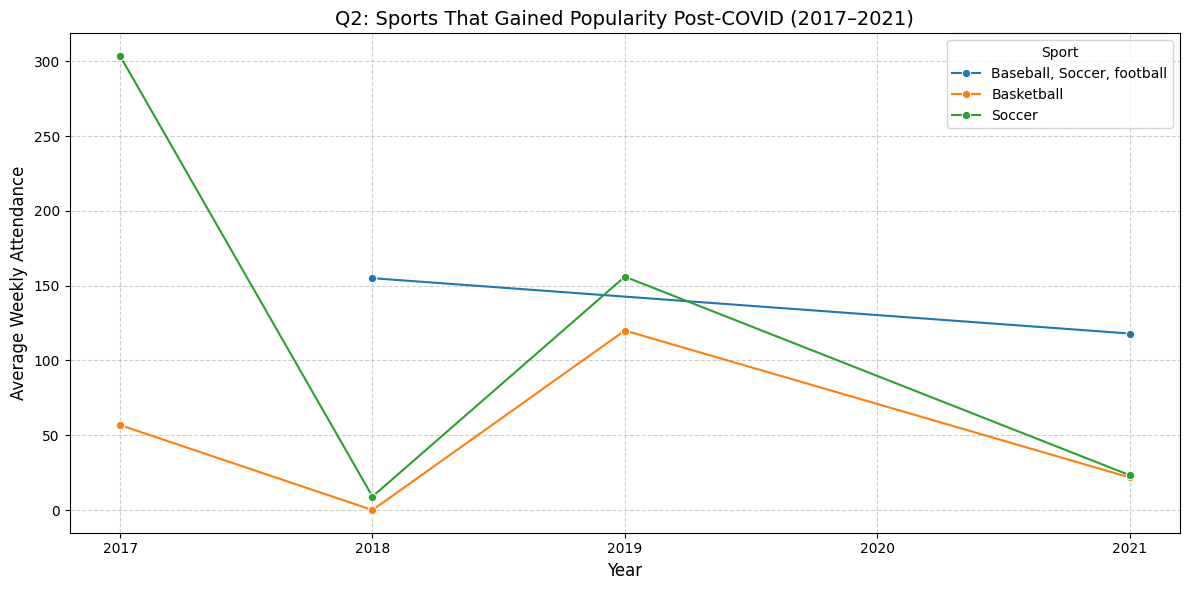

In [ ]:
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

# Convert dates
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])

# Extract year
df['Year'] = df['Week Start Date'].dt.year

# Filter for valid years
df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021])]

# Group by Sport and Year, calculate average attendance
sport_yearly_avg = df.groupby(['Sports Played', 'Year'])['Attendance Sum'].mean().reset_index()

# Identify sports with increasing attendance from pre-COVID (2017–2019 avg) to 2021
pre_covid_avg = sport_yearly_avg[sport_yearly_avg['Year'].isin([2017, 2018, 2019])]\
    .groupby('Sports Played')['Attendance Sum'].mean()

post_covid_2021 = sport_yearly_avg[sport_yearly_avg['Year'] == 2021]\
    .set_index('Sports Played')['Attendance Sum']

change = (post_covid_2021 - pre_covid_avg).dropna().sort_values(ascending=False)
top_gainers = change.head(5).index.tolist()  # Top 5 sports

# Filter the main data for top gaining sports
plot_data = sport_yearly_avg[sport_yearly_avg['Sports Played'].isin(top_gainers)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='Year', y='Attendance Sum', hue='Sports Played', marker='o')

plt.title("Q2: Sports That Gained Popularity Post-COVID (2017–2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Weekly Attendance", fontsize=12)
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Sport')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

# Convert dates
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])

# Extract year
df['Year'] = df['Week Start Date'].dt.year

# Filter for valid years
df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021])]

# Group by Sport and Year, calculate average attendance
sport_yearly_avg = df.groupby(['Sports Played', 'Year'])['Attendance Sum'].mean().reset_index()

# Identify sports with increasing attendance from pre-COVID (2017–2019 avg) to 2021
pre_covid_avg = sport_yearly_avg[sport_yearly_avg['Year'].isin([2017, 2018, 2019])]\
    .groupby('Sports Played')['Attendance Sum'].mean()

post_covid_2021 = sport_yearly_avg[sport_yearly_avg['Year'] == 2021]\
    .set_index('Sports Played')['Attendance Sum']

change = (post_covid_2021 - pre_covid_avg).dropna().sort_values(ascending=False)
top_gainers = change.head(5).index.tolist()  # Top 5 sports

# Filter the main data for top gaining sports
plot_data = sport_yearly_avg[sport_yearly_avg['Sports Played'].isin(top_gainers)]

# INTERACTIVE multi-line plot using Plotly
fig = px.line(
    plot_data,
    x='Year',
    y='Attendance Sum',
    color='Sports Played',
    markers=True,
    title="Q2: Sports That Gained Popularity Post-COVID (2017–2021)",
    labels={'Attendance Sum': 'Avg Weekly Attendance'}
)

fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(title='Average Weekly Attendance'),
    hovermode='x unified',
    template='plotly_white'
)

fig.show()
